# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [39]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
df = pd.read_csv('telecom_users.csv')

df = df.drop(columns = 'Unnamed: 0')
#View the data


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded_df = df.copy()
for column in encoded_df.select_dtypes(include='O').columns:
  if column != 'customerID':
    encoded_df[column]=le.fit_transform(encoded_df[column])
encoded_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1066,0
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,2901,0
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2126,1
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,308,0


In [41]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [42]:
df.duplicated().sum()


0

In [43]:
#Unique customers
len(df['customerID'].unique())

5986

In [44]:
#Dataset target values
encoded_df['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

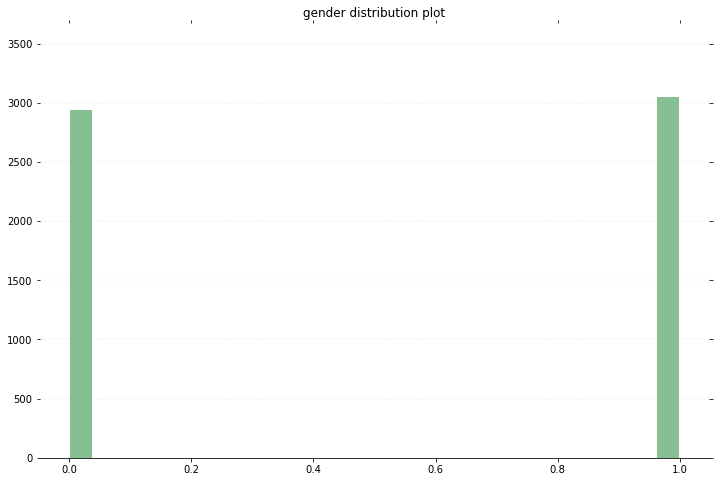

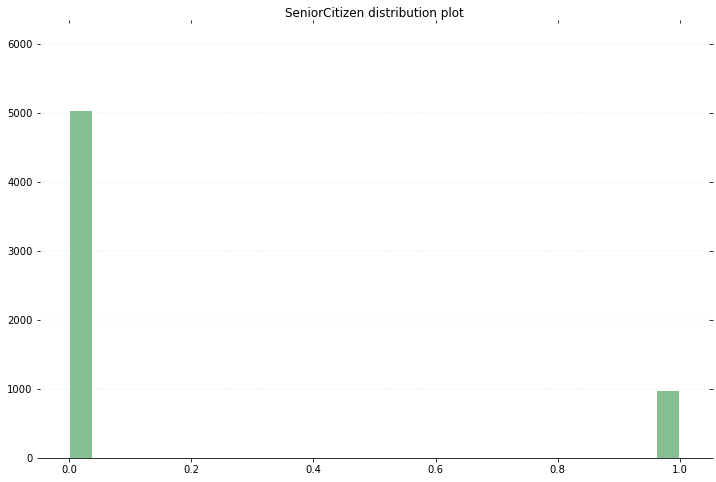

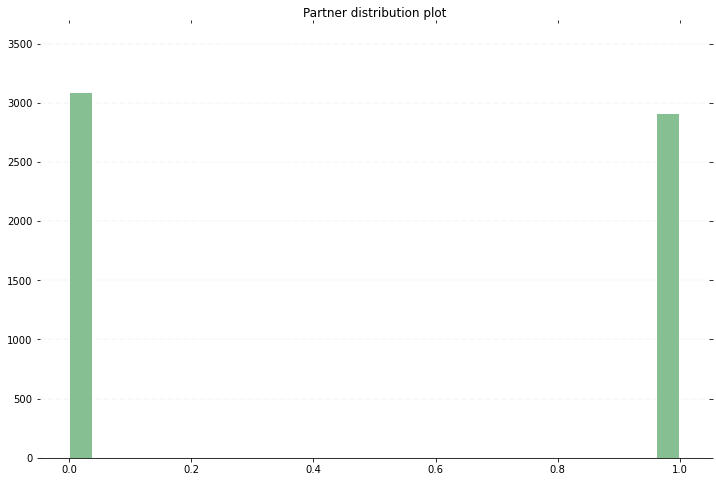

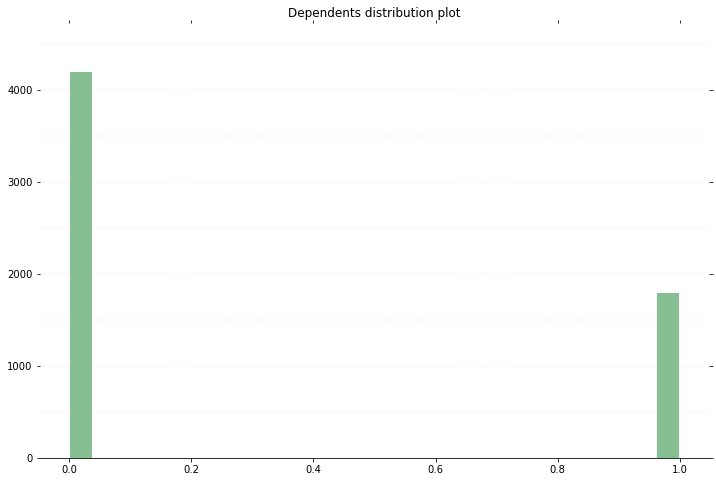

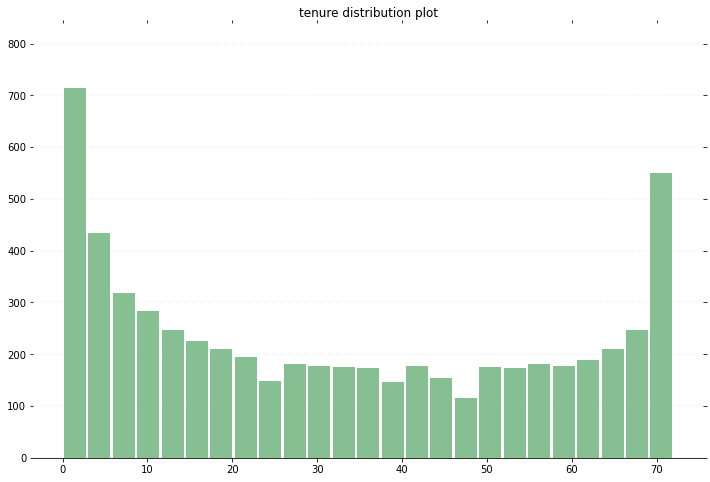

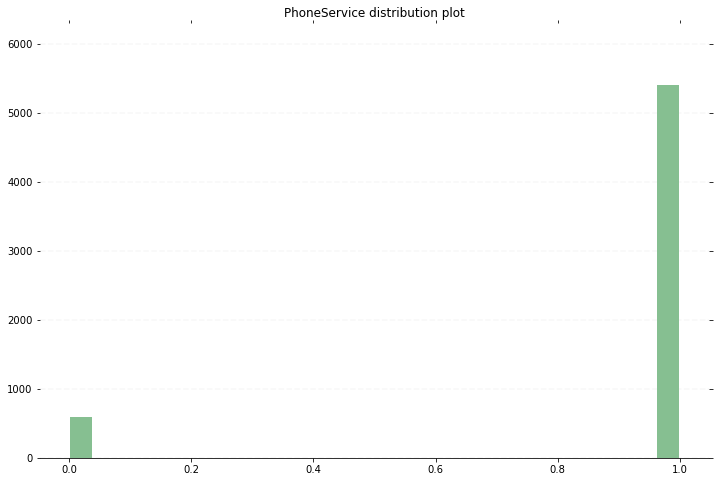

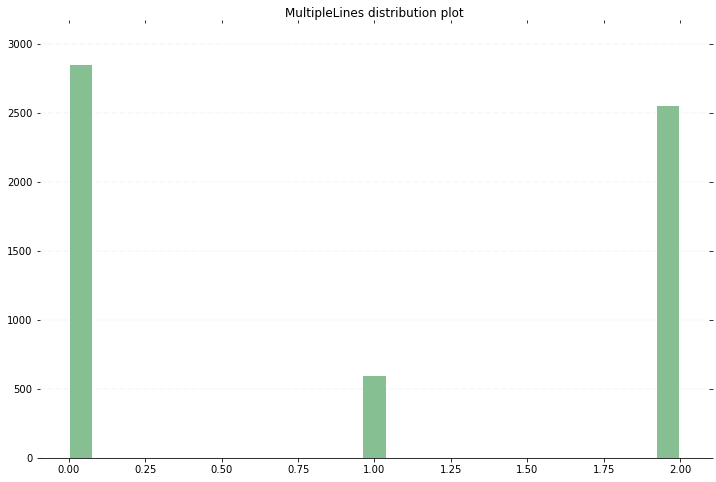

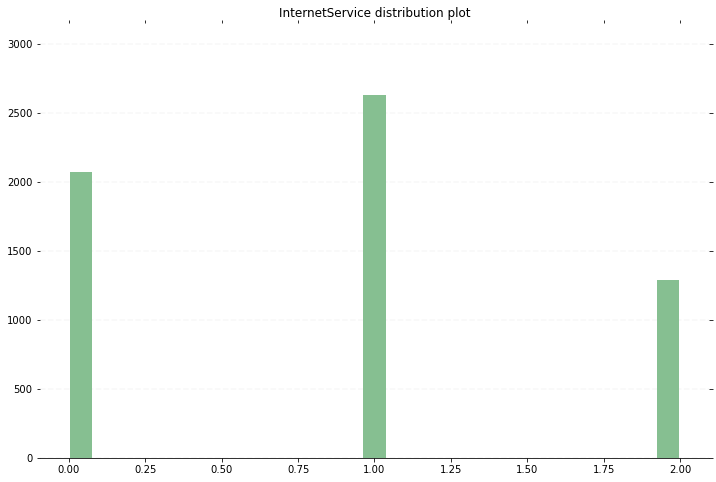

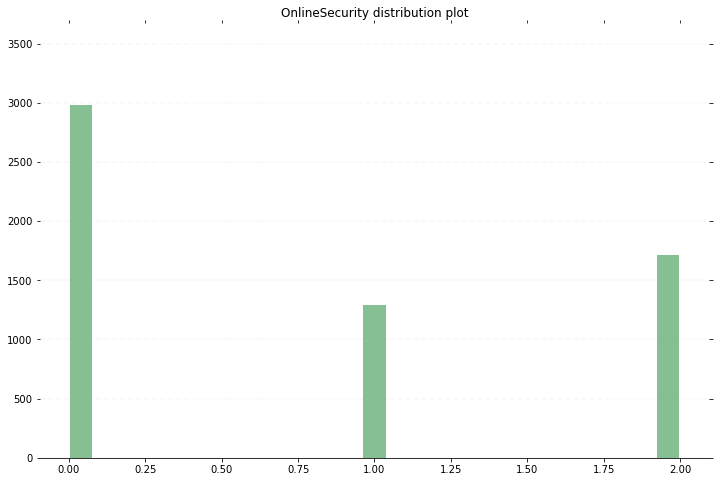

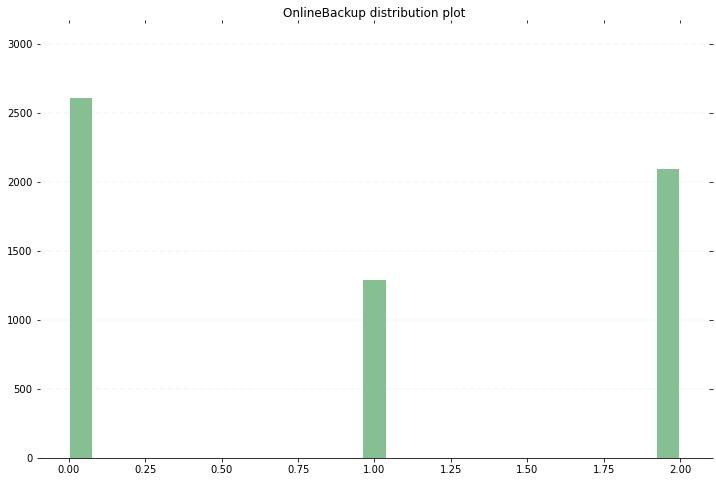

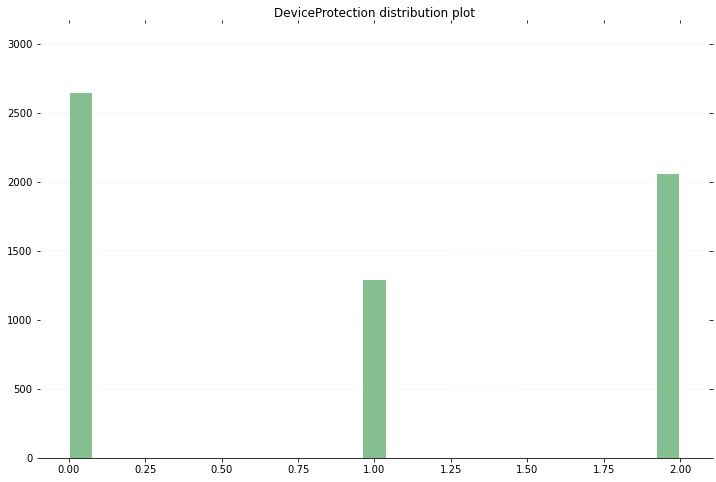

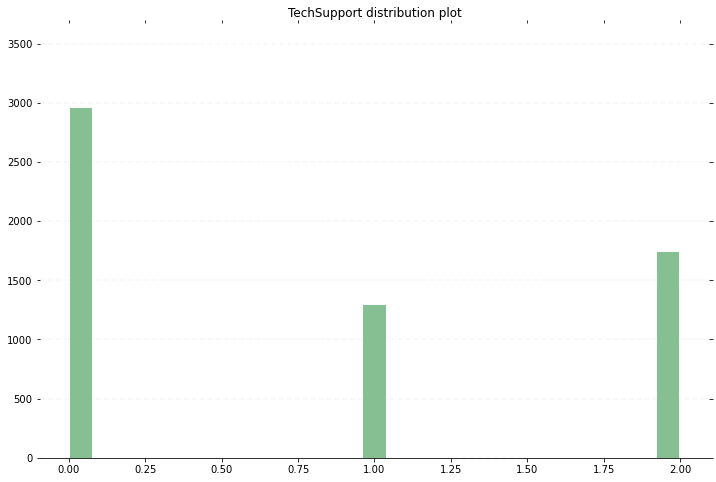

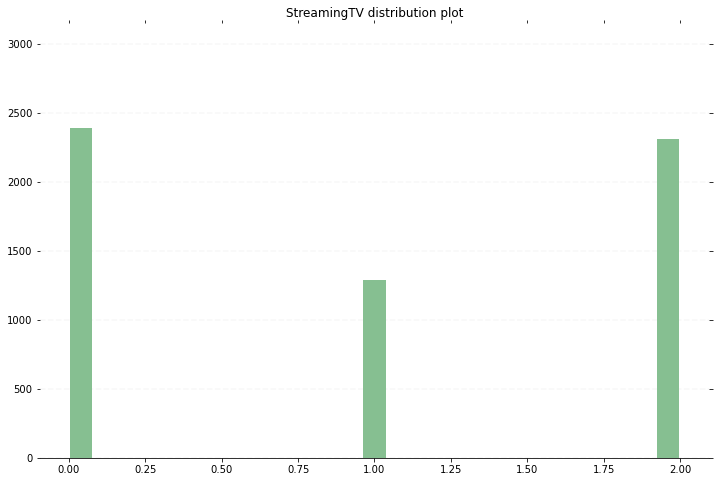

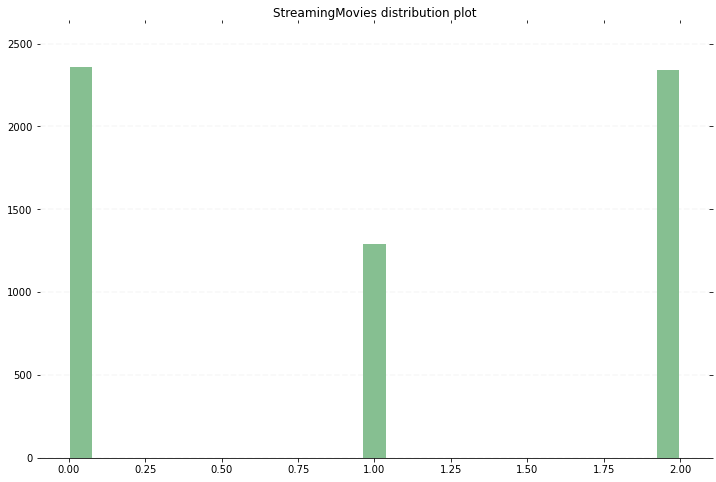

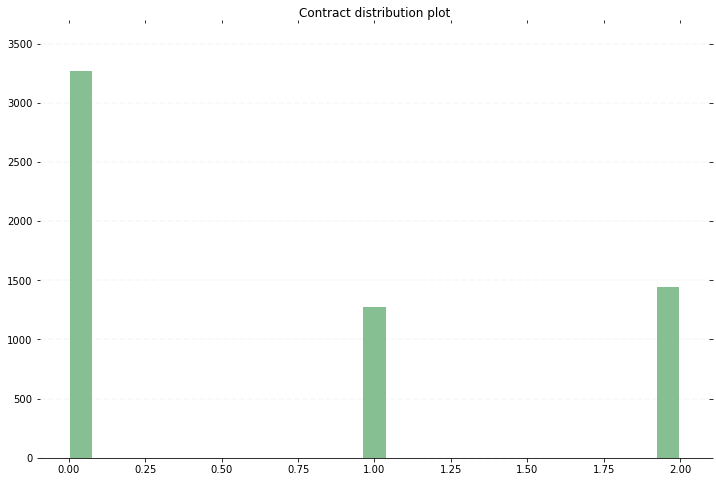

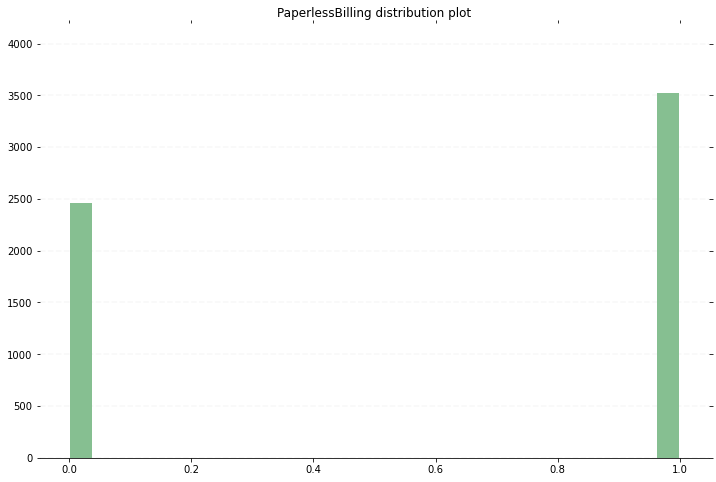

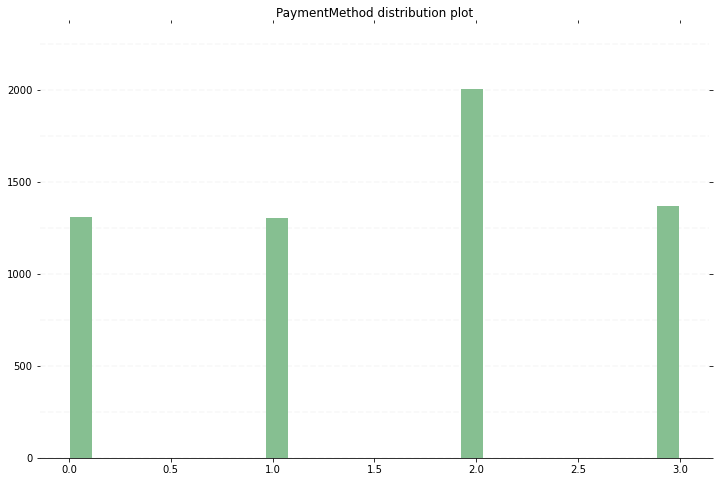

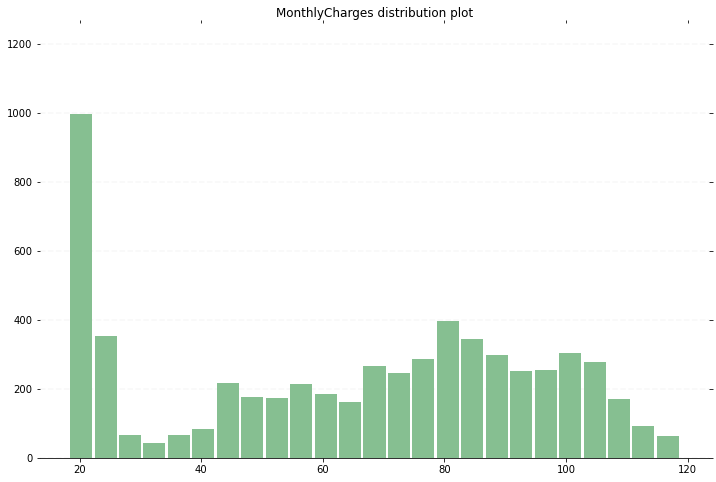

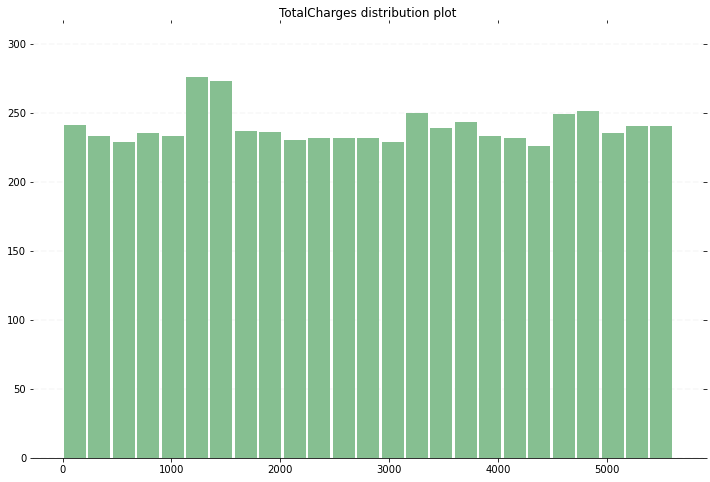

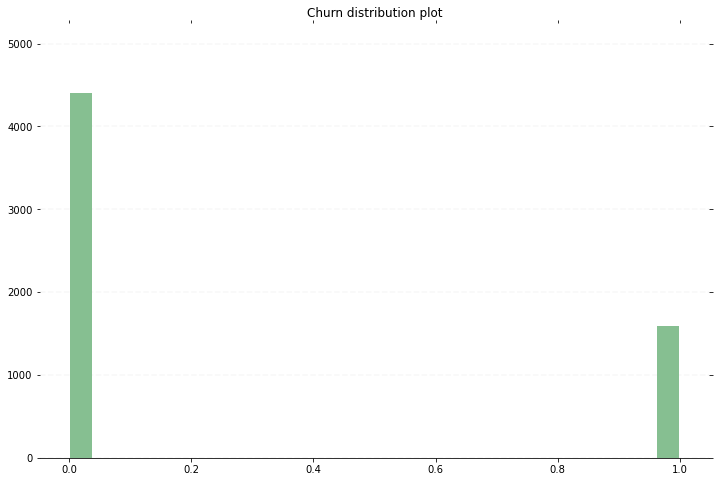

In [45]:
Cols = encoded_df.columns[1:]

for col in Cols:
  ax = encoded_df.hist(column=col, bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

  ax = ax[0]
  for x in ax:

      # Despine
      x.spines['right'].set_visible(False)
      x.spines['top'].set_visible(False)
      x.spines['left'].set_visible(False)

      # Switch off ticks
      x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

      # Draw horizontal axis lines
      vals = x.get_yticks()
      for tick in vals:
          x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

      # Remove title
      x.set_title(col + " distribution plot")


    # Format y-axis label


# 2. Исследование зависимостей и формулирование гипотез

In [46]:
encoded_df = encoded_df.drop('customerID',axis=1)
encoded_df.drop("Churn", axis=1).apply(lambda x: x.corr(encoded_df.Churn))


gender             -0.009548
SeniorCitizen       0.150097
Partner            -0.146840
Dependents         -0.160204
tenure             -0.348469
PhoneService        0.009421
MultipleLines       0.034943
InternetService    -0.047198
OnlineSecurity     -0.290306
OnlineBackup       -0.193851
DeviceProtection   -0.180120
TechSupport        -0.277261
StreamingTV        -0.037609
StreamingMovies    -0.039100
Contract           -0.396446
PaperlessBilling    0.188996
PaymentMethod       0.103927
MonthlyCharges      0.186753
TotalCharges        0.016573
dtype: float64

In [47]:
encoded_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1066,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,2901,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2126,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,1733,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,5540,1
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,1561,0
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2290,0
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,322,1


Мы увидели что тип контракта, тех поддержка, длительность обслуживания и онлайн безопасность имеют наибольшую корреляция с целевой переменной  

In [48]:
output = pd.pivot_table(data=encoded_df, 
                        index=['Contract'], 
                        columns=['Churn'], 
                        values='gender',
                        aggfunc='count')
output

Churn,0,1
Contract,,
0,1871,1398
1,1128,148
2,1400,41


In [49]:
pd.pivot_table(data=encoded_df, 
                        index=['TechSupport'], 
                        columns=['Churn'], 
                        values='gender',
                        aggfunc='count')


Churn,0,1
TechSupport,,
0,1738,1222
1,1192,99
2,1469,266


In [50]:
pd.pivot_table(data=encoded_df, 
                        index=['tenure'], 
                        columns=['Churn'], 
                        values='gender',
                        aggfunc='count')


Churn,0,1
tenure,,
0,10.0,NaN
1,192.0,318.0
2,90.0,104.0
3,87.0,82.0
4,81.0,73.0
...,...,...
68,81.0,8.0
69,71.0,6.0
70,80.0,10.0


# 3. Построение моделей для прогнозирования оттока

In [51]:
### YOUR CODE HERE ###
y=encoded_df['Churn']
x = encoded_df.drop(columns=["Churn"])
#Для того чтобы убедиться в правильности выборов предктиров можно использовать функция для перепроверки
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
# define feature selection
selector =SelectKBest(score_func=f_classif, k=5)
selector.fit(x, y)
x.columns[selector.get_support()]




Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract'], dtype='object')

In [52]:
encoded_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1066,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,2901,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2126,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,1733,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,5540,1
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,1561,0
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2290,0
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,322,1


In [53]:
x.loc[:,['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract']]

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract
0,72,1,1,1,2
1,44,0,2,0,0
2,38,0,0,0,0
3,4,0,0,0,0
4,2,2,0,0,0
...,...,...,...,...,...
5981,1,2,0,0,0
5982,23,2,2,2,2
5983,12,1,1,1,0
5984,12,0,0,0,0


Метод KBest показал результаты схожие которые мы получили с помощью коэф. корреляций.
Возьмем 5 фичей для предсказания нашей целевой переменной

In [54]:
# ваш код
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

x_feauter = x.loc[:,['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract']]
x_train, x_test, y_train, y_test = train_test_split(x_feauter, y, test_size=.3, stratify=y, random_state=17)
params = {'objective': 'binary:logistic', 
          'max_depth': 1, 
          'silent': 1, 
          'eta': 1}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
xgb_model = xgb.train(dtrain=dtrain, params=params,num_boost_round = 30)
matrix = xgb_model.predict(dtest)
binary_matrix = [1 if element > 0.5 else 0 for element in matrix ]

num_rounds = 30

xgb_model = xgb.train(dtrain=dtrain, params=params,num_boost_round = 30)
matrix = xgb_model.predict(dtest)
binary_matrix = [1 if element > 0.5 else 0 for element in matrix ]
# ваш код
print('Confusion matrix:', confusion_matrix(y_test, binary_matrix))
print('Precision:',precision_score(y_test, binary_matrix))
print('recall:',recall_score(y_test, binary_matrix))
res1 = precision_score(y_test, binary_matrix)
res1_rc = recall_score(y_test, binary_matrix)

[13:51:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:51:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Confusion matrix: [[1209  111]
 [ 279  197]]
Precision: 0.6396103896103896
recall: 0.41386554621848737


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

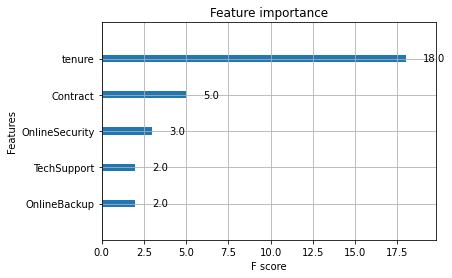

In [55]:
xgb.plot_importance(xgb_model)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    train_size=0.8,
                                                    random_state=17)

knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(random_state=17)
svc = SVC(random_state=17)

meta = XGBClassifier(n_estimators=40)

# ваш код


def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        meta_mtrx = np.empty((data_train.shape[0], len(models))) 
        for n,model in enumerate(models):
          meta_mtrx[:, n]= cross_val_predict(model,data_train,targets_train,method='predict')
          model = model.fit(data_train,targets_train)
        meta_model = meta_alg.fit(meta_mtrx,targets_train)
        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) 
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
    
        meta_predict = meta.predict(meta_mtrx_test)
        if targets_test is not None:
            print(f'Stacking AUC: {roc_auc_score(targets_test, meta_predict)}')
            return roc_auc_score(targets_test, meta_predict)
    elif test_size > 0 and test_size < 1:
        x_train, valid, y_train, valid_true = train_test_split(data_train, 
                                                      targets_train, 
                                                      test_size=test_size, 
                                                      random_state=17)
        meta_mtrx = np.empty((valid.shape[0], len(models))) 
        
        print(meta_mtrx.shape)
        for n, model in enumerate(models):
            model = model.fit(x_train,y_train)
            meta_mtrx[:, n]= model.predict(valid)
        meta_model = meta_alg.fit(meta_mtrx, valid_true)
        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) 

        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
    
        meta_predict = meta.predict(meta_mtrx_test)
        if targets_test is not None:
            print(f'Stacking AUC: {roc_auc_score(targets_test, meta_predict)}')
            return roc_auc_score(targets_test, meta_predict)
            
    else:
        raise ValueError("test_size must be between 0 and 1")
# ваш код
models = [knn,lr,svc]
print(stacking(models,meta,x_train,y_train,x_test,y_test,test_size = 0.7))
print(stacking(models,meta,x_train,y_train,x_test,y_test,test_size = 0.3))
print(stacking(models,meta,x_train,y_train,x_test,y_test,test_size = None))


(3352, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking AUC: 0.7052796203419079
0.7052796203419079
(1437, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking AUC: 0.7186557371155332
0.7186557371155332


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Stacking AUC: 0.7129842348415395
0.7129842348415395


# 4. Сравнение качества моделей 

In [66]:
res2 =stacking(models,meta,x_train,y_train,x_test,y_test,test_size = 0.3)


(1437, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking AUC: 0.7186557371155332


In [72]:
# Prepare lists
from sklearn.model_selection import cross_val_score

models = [knn,lr,svc]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(x_train, y_train)
    acc = cross_val_score(mod, x_train, y_train, scoring = 
    "accuracy", cv = 10)
    scores.append(acc.mean())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [77]:
models.append(xgb)
models.append('stacking')
models

[KNeighborsClassifier(n_neighbors=3),
 LogisticRegression(random_state=17),
 SVC(random_state=17),
 <module 'xgboost' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\xgboost\\__init__.py'>,
 'stacking']

In [78]:
scores.append(res1)
scores.append(res2)
scores

[0.7249329583074922,
 0.7955272053877935,
 0.7343358286527896,
 0.6396103896103896,
 0.7186557371155332]

In [83]:
for i in range(len(scores)):
    print(models[i],scores[i])

KNeighborsClassifier(n_neighbors=3) 0.7249329583074922
LogisticRegression(random_state=17) 0.7955272053877935
SVC(random_state=17) 0.7343358286527896
<module 'xgboost' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\xgboost\\__init__.py'> 0.6396103896103896
stacking 0.7186557371155332


В данной задача простая Логистическая Регрессия показала себя лучше продвинутых техник
